In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [56]:
df = pd.read_csv("dump.txt")

In [57]:
SIZE = 101
NUMBER_OF_ATOMS = 4000

In [103]:
sigma_array = []
atoms_array = []
for i in range(SIZE):
    atoms = df.iloc[9 * (i + 1) + 4000 * i - 1:9 * (i + 1) + 4000 * (i + 1) - 1]['ITEM: TIMESTEP'] \
        .str \
        .split(' ', 5, expand=True)
    if not atoms.empty:
        atoms = np.array(atoms, dtype=np.float64)
        
        id_, type_, xs, ys, zs = atoms.T
        sigma_2 = np.mean(xs ** 2 + ys ** 2 + zs ** 2)
        sigma = np.sqrt(sigma_2)
        
        sigma_array.append(sigma_2)
        atoms_array.append(np.array([id_, type_, xs, ys, zs]))
    else:
        break

In [104]:
t = np.arange(SIZE)

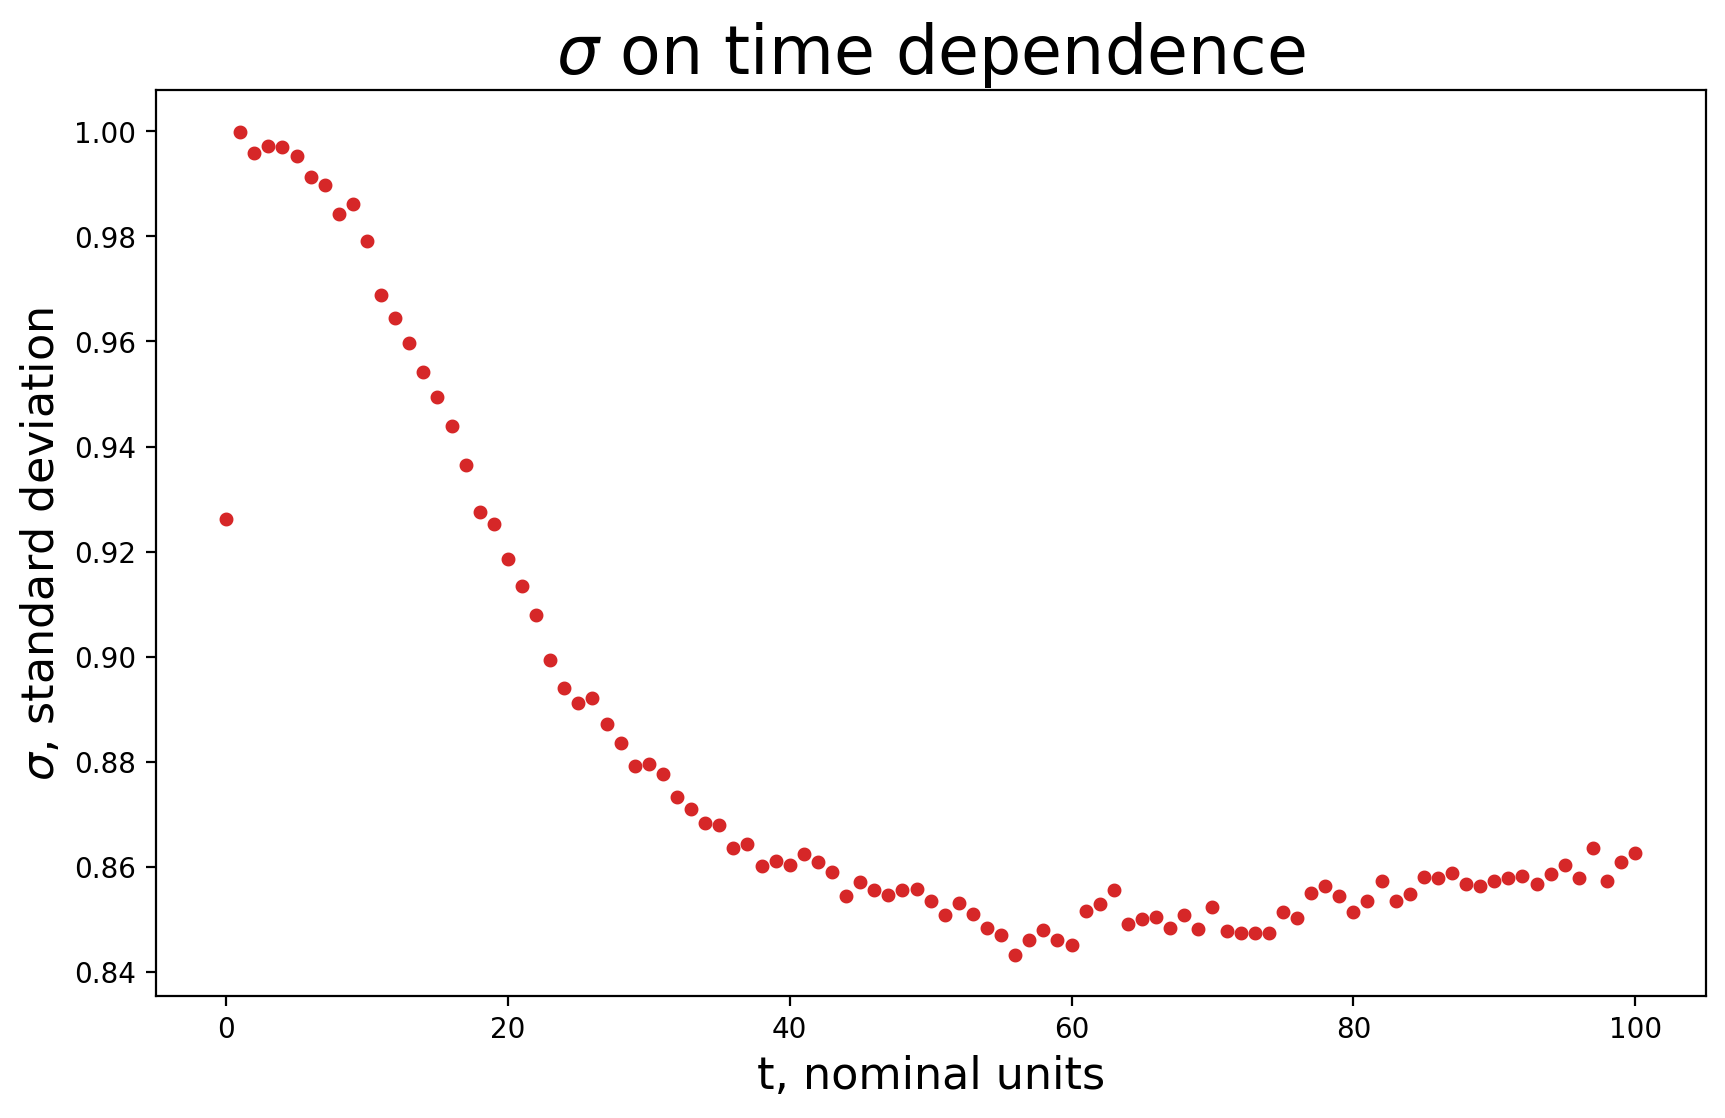

In [105]:
plt.figure(figsize=(10, 6), dpi=200)
plt.scatter(t, sigma_array, color='tab:red', linewidth=2, marker='.')

plt.title(r'$\sigma$ on time dependence', fontsize=24)
plt.xlabel('t, nominal units', fontsize=16)
plt.ylabel(r'$\sigma$, standard deviation', fontsize=16)

plt.show()

In [106]:
atoms = atoms_array[0]
xs, ys, zs = atoms[2], atoms[3], atoms[4]

sigma_2 = np.mean(xs ** 2 + ys ** 2 + zs ** 2)
sigma_2

0.92625

In [107]:
xs

array([0.  , 0.05, 0.05, ..., 0.7 , 0.8 , 0.9 ])

In [108]:
ys

array([0.  , 0.05, 0.  , ..., 0.95, 0.95, 0.95])

In [109]:
zs

array([0.  , 0.  , 0.05, ..., 0.95, 0.95, 0.95])